# Implementing K-Means Clusturing

In [1]:
import os
os.environ["OMP_NUM_THREADS"] = "1"

In [2]:
## import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Know Your Data

In [3]:
data = pd.read_csv(r'Mall_Customers.csv')

In [4]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
## columns 
data.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [6]:
## shape of the data
data.shape

(200, 5)

In [7]:
## info of the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [8]:
## missing values
data.isna().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [9]:
## duplicates
data.duplicated().sum()

0

In [10]:
## summary of numerical features
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [11]:
## summary of categorical features
data.select_dtypes(include='object').describe()

,Gender
count,200
unique,2
top,Female
freq,112


In [12]:
data=data.drop('CustomerID',axis=1)

In [13]:
data.columns

Index(['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)'], dtype='object')

In [14]:
numerical = data.select_dtypes(exclude='object').columns.tolist()
categorical = data.select_dtypes(include='object').columns.tolist()

# Visualization

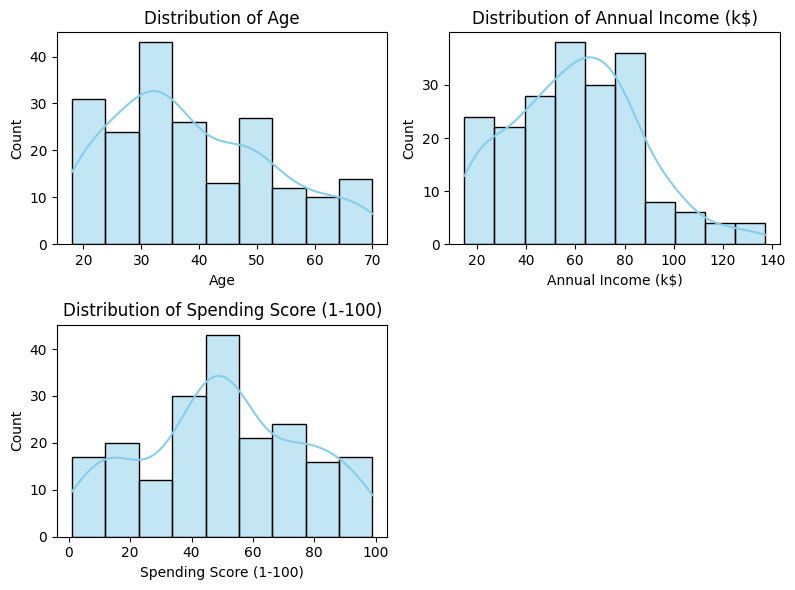

In [15]:
n_cols = 2
n_rows = (len(numerical)+1)//2

plt.figure(figsize=(8,6))
for i, col in enumerate(numerical,1):
    plt.subplot(n_rows,n_cols,i)
    sns.histplot(x=col,data=data,kde=True,color='skyblue')
    plt.title(f"Distribution of {col}")

plt.tight_layout()
plt.show()

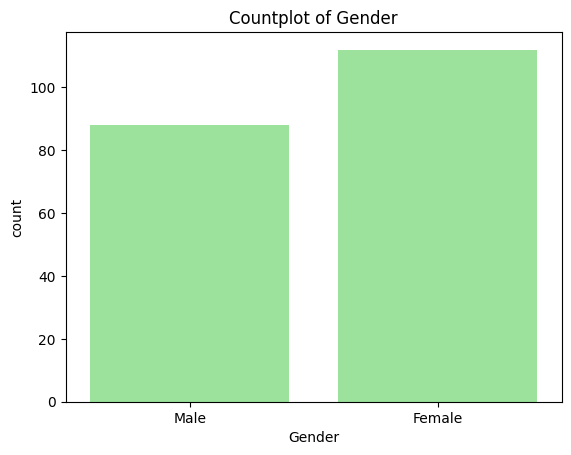

In [16]:
sns.countplot(x='Gender',data=data,color='lightgreen')
plt.title("Countplot of Gender")
plt.show()

* The lesser the model inertia, the better the model fit.

* We can see that the model has low  inertia. So, this is  a good model fit to the data.

# *Clustering by Annual Income and Spending Score*

In [17]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X1 = data[['Annual Income (k$)', 'Spending Score (1-100)']]
X1_scaled = scaler.fit_transform(X1)

* **WCSS is inertia which is nothing but the distance b/w the points and the centroid**

* The lesser the model inertia, the better the model fit.


399.99999999999994
274.0906128402976
157.70400815035939
108.92131661364358
65.56840815571681
57.38174746022787
47.338486736388234
42.42564554911967
32.81363694105779


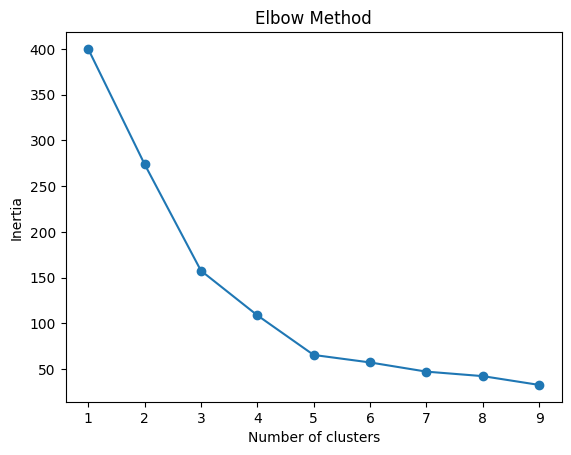

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

wcss = []

for i in range(1,10):
    km = KMeans(n_clusters = i,random_state=0,max_iter=300,init='k-means++')
    km.fit_predict(X1_scaled)
    wcss.append(km.inertia_)

plt.plot(range(1,10),wcss,marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

### Insights:

* The curve shows a noticeable inflection point—an “elbow”—between 5 and 7 clusters. After that, the inertia reduction starts to taper off, which means adding more clusters doesn’t dramatically improve performance.

* Let's try k=5 to k=10 and compare silhouette scores.

## Silhoutte scores

**Range:** Scores range from -1 to +1.

* **> 0.5:** Strong structure.

* **0.3–0.5:** Moderate structure (current case).

* **< 0.3:** Weak or overlapping clusters.


In [19]:
silhouette_scores = []

for i in range(5,8):
    kmeans = KMeans(n_clusters=i, random_state=0, max_iter=300,init='k-means++')
    kmeans.fit(X1_scaled)
    labels = kmeans.labels_

    score = silhouette_score(X1_scaled, labels)  
    silhouette_scores.append(score)

    print(f"Silhouette score for {i} clusters: {score:.3f}")

Silhouette score for 5 clusters: 0.555
Silhouette score for 6 clusters: 0.457
Silhouette score for 7 clusters: 0.454


### Insights:
* here silhouette score is 0.55 > 0.5 for 5 clusters which indicates a strong structure
* so optimal no. of clusters is 5

In [20]:
km = KMeans(n_clusters=5)
labels = km.fit_predict(X1_scaled)

In [21]:
labels

array([4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1,
       4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 0,
       4, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 3, 2, 0, 2, 3, 2, 3, 2,
       0, 2, 3, 2, 3, 2, 3, 2, 3, 2, 0, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2])

### Visualizing clusters

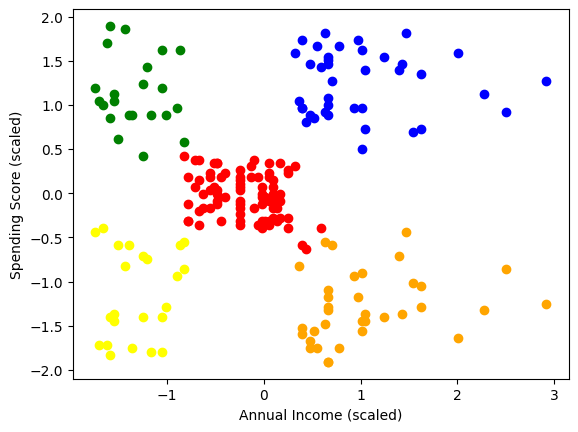

In [22]:
plt.scatter(X1_scaled[labels==0,0],X1_scaled[labels==0,1],color='red')
plt.scatter(X1_scaled[labels==1,0],X1_scaled[labels==1,1],color='green')
plt.scatter(X1_scaled[labels==2,0],X1_scaled[labels==2,1],color='blue')
plt.scatter(X1_scaled[labels==3,0],X1_scaled[labels==3,1],color='orange')
plt.scatter(X1_scaled[labels==4,0],X1_scaled[labels==4,1],color='yellow')


plt.xlabel("Annual Income (scaled)")
plt.ylabel("Spending Score (scaled)")

plt.show()

### Insights:

1. **Red:**
    * spending - moderate, income - moderate
    * Mid-range shoppers with balanced habits

2. **Blue:**
    * spending - high, income - high
    * premium,enthusiastic spenders

3. **Yellow:**
    * spending - low, income - low
    * price-sensitive, cautious consumers

4. **Orange:**
    * spending - low, income - high
    * wealthy but reserved spenders

5. **Green:**
    * spending - high, income - low
    * budget-cautious but active spenders


# *Clustering by Age and Spending Score*

In [23]:
X2 = data[['Age', 'Spending Score (1-100)']]
X2_scaled = scaler.fit_transform(X2)

Inertia: 400.00000000000006
Inertia: 189.3874903399244
Inertia: 124.33553836009898
Inertia: 89.84853511210653
Inertia: 74.68277474965184
Inertia: 53.52081185461199
Inertia: 47.608123520555544
Inertia: 41.144259056199
Inertia: 35.25156394324489


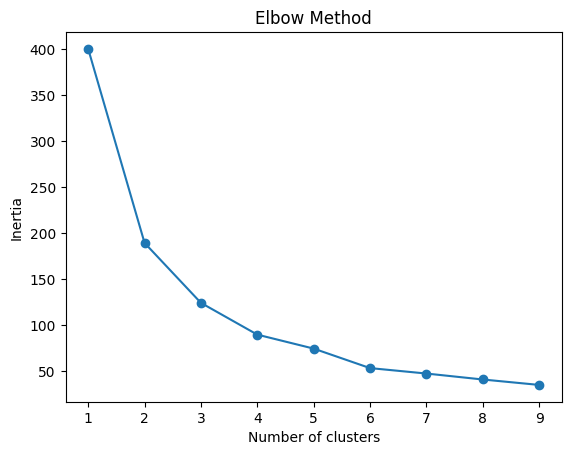

In [ ]:
wcss = []

for i in range(1,10):
    km = KMeans(n_clusters = i,random_state=0,max_iter=300,init='k-means++')
    km.fit_predict(X2_scaled)
    wcss.append(km.inertia_)

plt.plot(range(1,10),wcss,marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

### Insights:

* The curve shows a noticeable inflection point—an “elbow”—between 5 and 7 clusters. After that, the inertia reduction starts to taper off, which means adding more clusters doesn’t dramatically improve performance.

* Let's try k=5, k=6,k=7 and compare silhouette scores.

## silhouette scores

**Range:** Scores range from -1 to +1.

* **> 0.5:** Strong structure.

* **0.3–0.5:** Moderate structure (current case).

* **< 0.3:** Weak or overlapping clusters.


In [25]:
silhouette_scores = []

for i in range(5,8):
    kmeans = KMeans(n_clusters=i, random_state=0, max_iter=300,init='k-means++')
    kmeans.fit(X1_scaled)
    labels = kmeans.labels_

    score = silhouette_score(X1_scaled, labels)  
    silhouette_scores.append(score)

    print(f"Silhouette score for {i} clusters: {score:.3f}")

Silhouette score for 5 clusters: 0.555
Silhouette score for 6 clusters: 0.457
Silhouette score for 7 clusters: 0.454


### Insights:

* here silhouette score is 0.55 > 0.5 for 5 clusters which indicates a strong structure
* so optimal no. of clusters is 5

In [26]:
km = KMeans(n_clusters=5)
labels = km.fit_predict(X2_scaled)

In [27]:
labels

array([0, 1, 0, 1, 0, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 0, 1, 4, 1, 0, 1,
       4, 1, 4, 1, 3, 1, 3, 1, 4, 1, 4, 1, 4, 1, 4, 1, 0, 1, 2, 1, 3, 1,
       4, 1, 3, 0, 0, 0, 3, 1, 0, 2, 3, 3, 3, 2, 0, 3, 2, 0, 2, 3, 2, 0,
       3, 2, 0, 0, 2, 3, 2, 2, 2, 0, 3, 3, 0, 3, 2, 3, 2, 3, 0, 3, 3, 0,
       1, 3, 2, 0, 3, 3, 0, 0, 3, 0, 3, 0, 0, 3, 2, 0, 3, 0, 2, 3, 2, 2,
       2, 0, 3, 0, 0, 0, 2, 3, 3, 3, 0, 3, 3, 1, 0, 1, 3, 1, 4, 1, 4, 1,
       0, 1, 0, 1, 4, 1, 0, 1, 4, 1, 0, 1, 0, 1, 3, 1, 0, 1, 4, 1, 4, 1,
       4, 1, 4, 1, 4, 1, 3, 1, 0, 1, 4, 1, 4, 1, 0, 1, 4, 1, 4, 1, 4, 1,
       4, 1, 4, 1, 0, 1, 4, 1, 3, 1, 4, 1, 4, 1, 0, 1, 4, 1, 4, 1, 4, 1,
       0, 1])

### Visualizing clusters

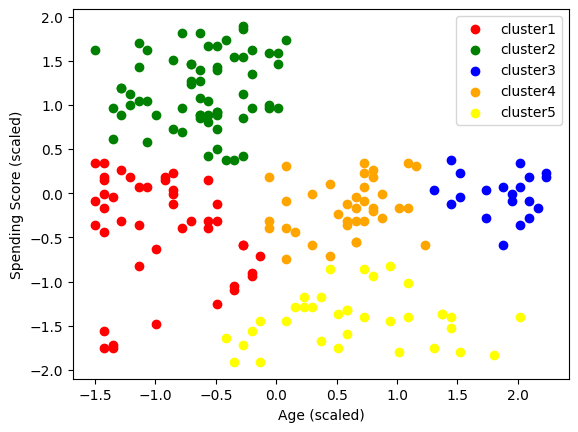

In [28]:
plt.scatter(X2_scaled[labels==0,0],X2_scaled[labels==0,1],color='red',label='cluster1')
plt.scatter(X2_scaled[labels==1,0],X2_scaled[labels==1,1],color='green',label='cluster2')
plt.scatter(X2_scaled[labels==2,0],X2_scaled[labels==2,1],color='blue',label='cluster3')
plt.scatter(X2_scaled[labels==3,0],X2_scaled[labels==3,1],color='orange',label='cluster4')
plt.scatter(X2_scaled[labels==4,0],X2_scaled[labels==4,1],color='yellow',label='cluster5')


plt.xlabel("Age (scaled)")
plt.ylabel("Spending Score (scaled)")
plt.legend()
plt.show()

### Insights:

1. **Green:**
    * Age - younger, spending - high
    * Energetic youth with bold spending habits

2. **Blue:**
    * Age - old age, spending - high
    * balanced big spenders (affluent seniors with strong purchasing power).

3. **Yellow:**
    * Age - mid/old age, spending - low
    * conservative with limited engagement

4. **Orange:**
    * Age - Mid aged, spending - low
    * mature, steady spenders

5. **Red:**
    * Age - younger, spending - low moderate
    * cautious youth, reserved spenders
